In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
print('All libraries imported')

All libraries imported


In [94]:
#Set up the parameters
%matplotlib inline 

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis') 
sns.set_style('white') 
sns.set_context('talk', font_scale=0.8)

In [143]:
praisedata = pd.read_csv('train_data.csv') 
praisedata.head()

praisedata1 = pd.read_csv('test_data.csv') 
praisedata1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15642544,Henderson,723,France,Male,34,5,0.00,2,0,1,12092.03
1,15779492,Trevisano,796,Spain,Male,56,6,94231.13,1,0,0,121164.60
2,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41
3,15582591,Chiabuotu,615,Spain,Male,59,4,155766.05,1,1,1,110275.17
4,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42


In [96]:
#Dataset columns
praisedata.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [97]:
#To get the data size

praisedata.shape

(7000, 13)

In [98]:
#Dataset header

praisedata.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


## To check for missing values

In [99]:
#Sum the missing values in the data

praisedata.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [100]:
#Different gender we have

praisedata.Gender.value_counts()

Male      3843
Female    3157
Name: Gender, dtype: int64

In [101]:
#Different geography we have

praisedata.Geography.value_counts()

France     3518
Germany    1755
Spain      1727
Name: Geography, dtype: int64

In [102]:
#To get the summary statistics of the data

praisedata.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1.569078e+07,649.424000,38.932857,5.008143,77006.866360,1.525857,0.709286,0.514429,99783.685516,0.201429
std,7.191100e+04,97.478815,10.467815,2.891734,62392.609703,0.582318,0.454124,0.499827,57358.455381,0.401096
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562847e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50957.302500,0.000000
50%,1.569053e+07,651.000000,37.000000,5.000000,97529.180000,1.000000,1.000000,1.000000,99594.475000,0.000000
75%,1.575333e+07,716.000000,44.000000,7.000000,127942.495000,2.000000,1.000000,1.000000,149462.720000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199953.330000,1.000000


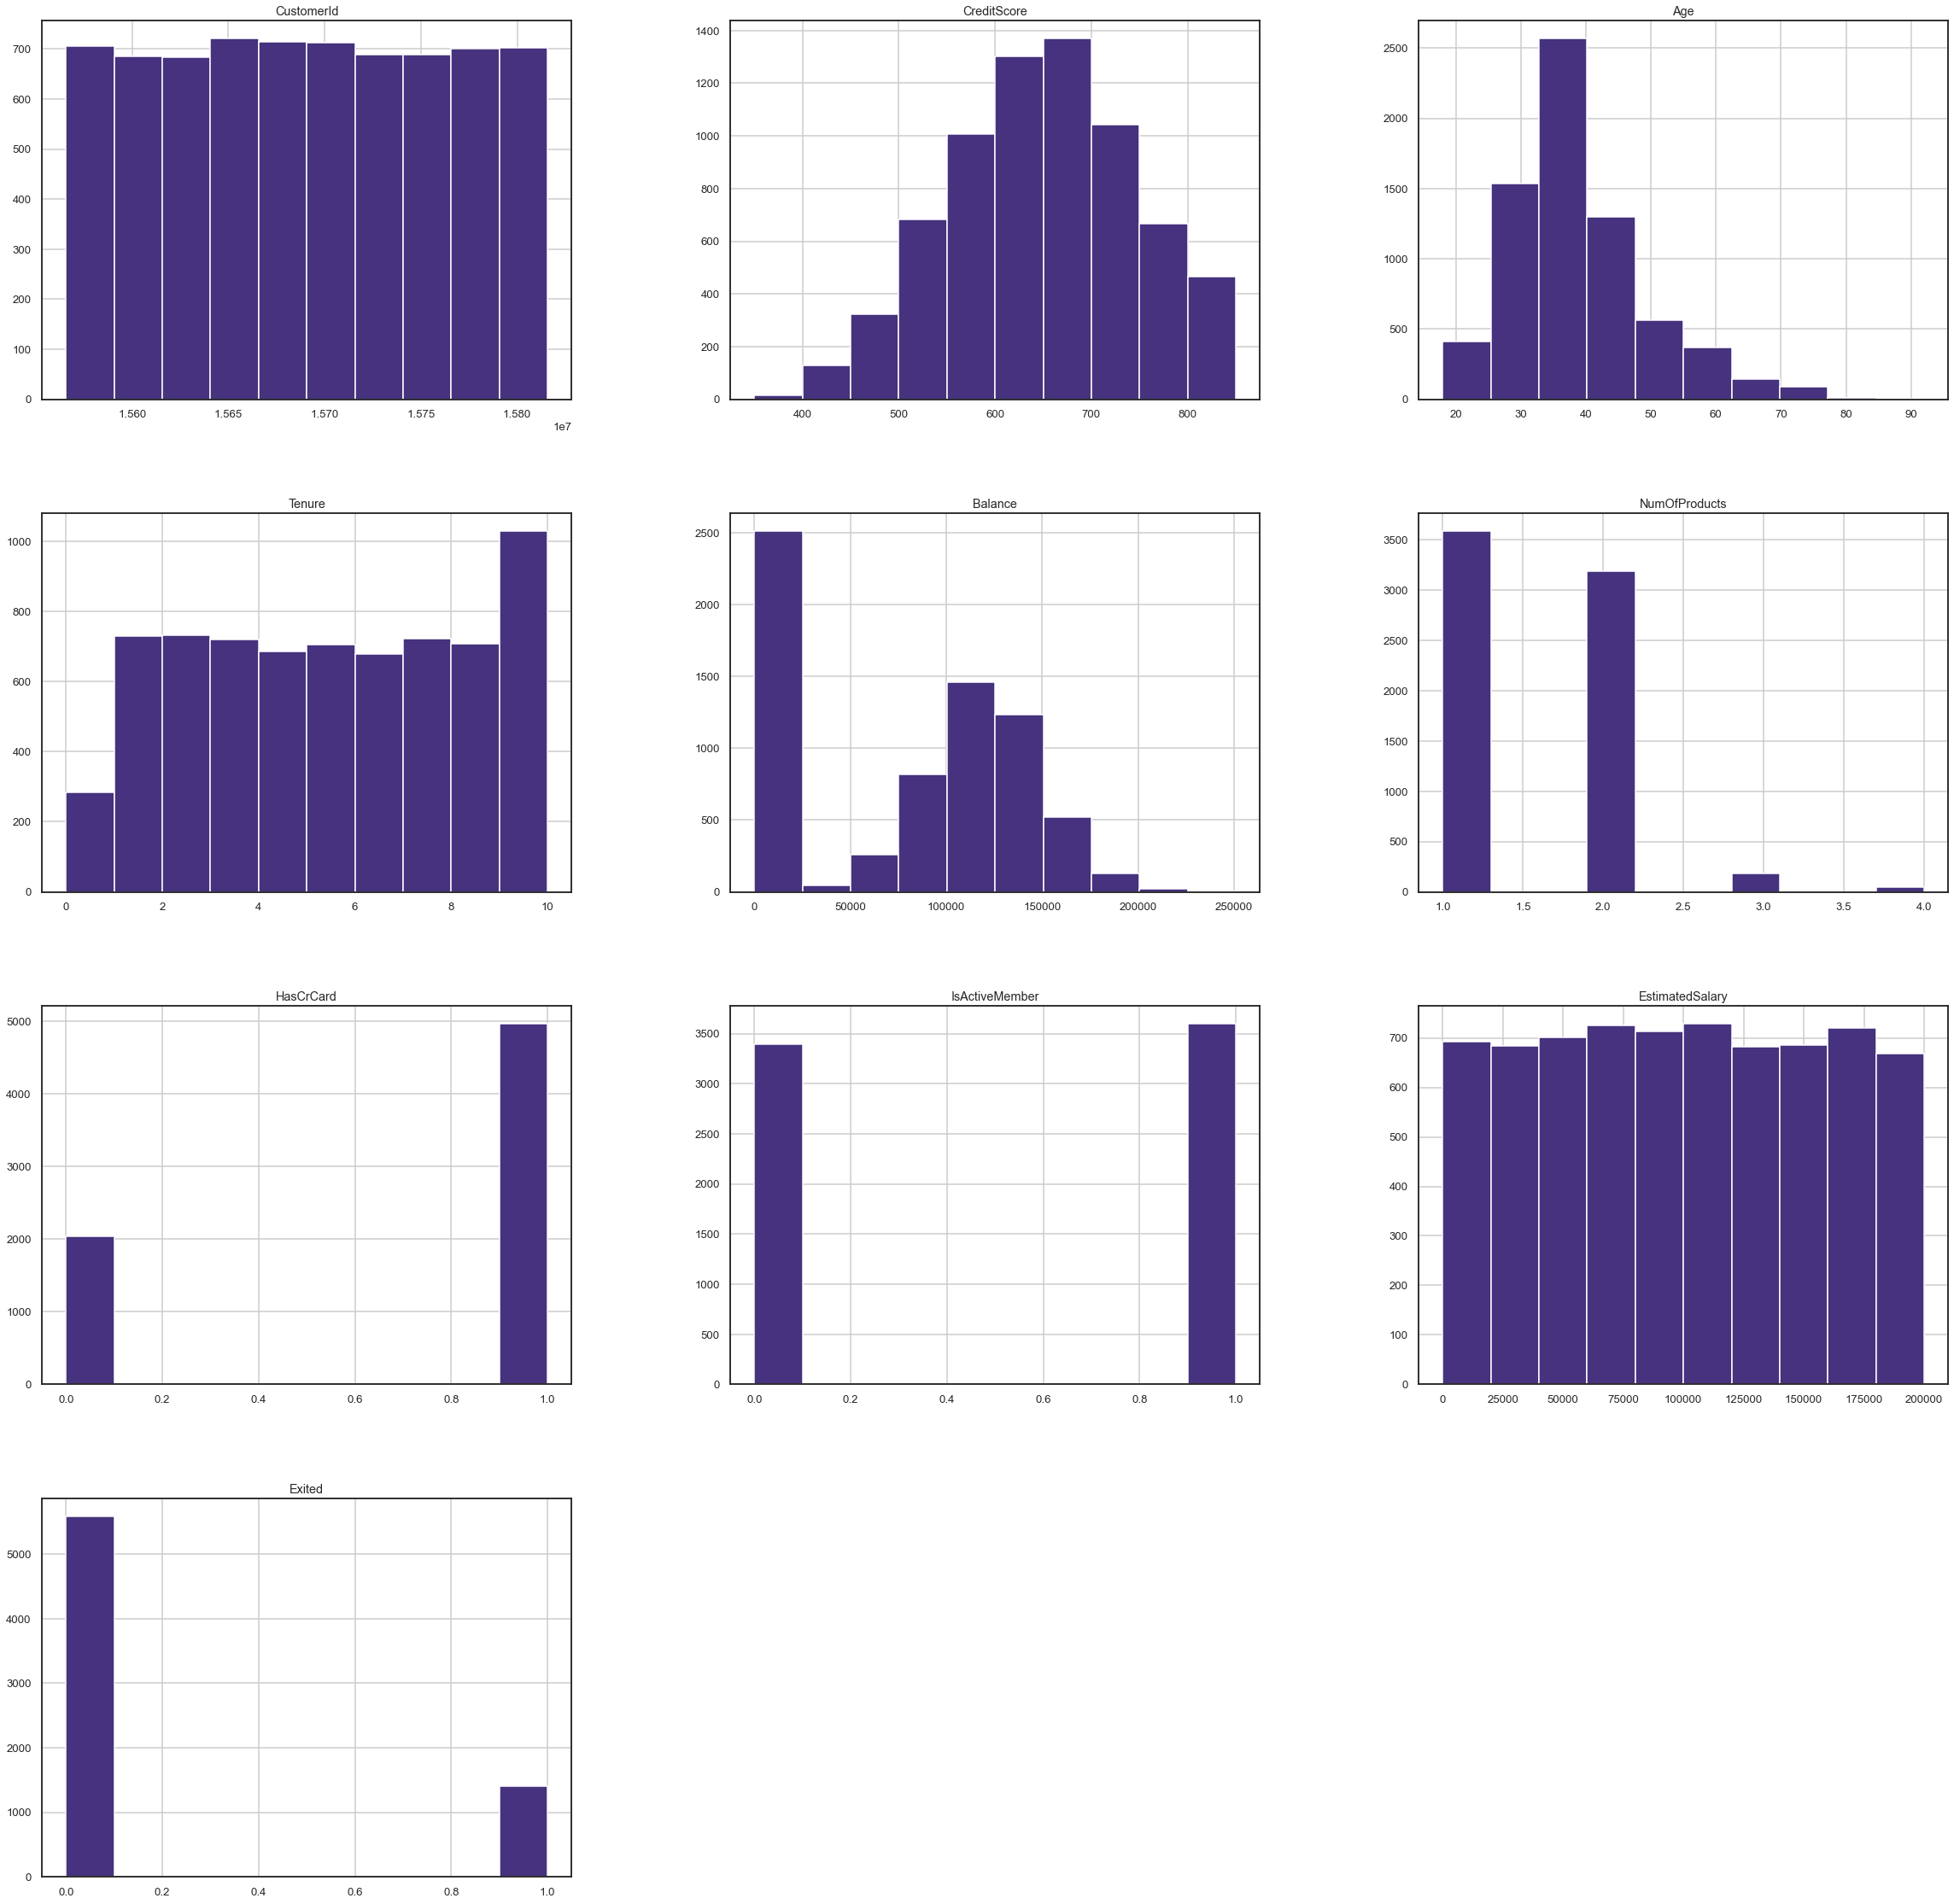

In [103]:
praisedata.hist(figsize=(40,40))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


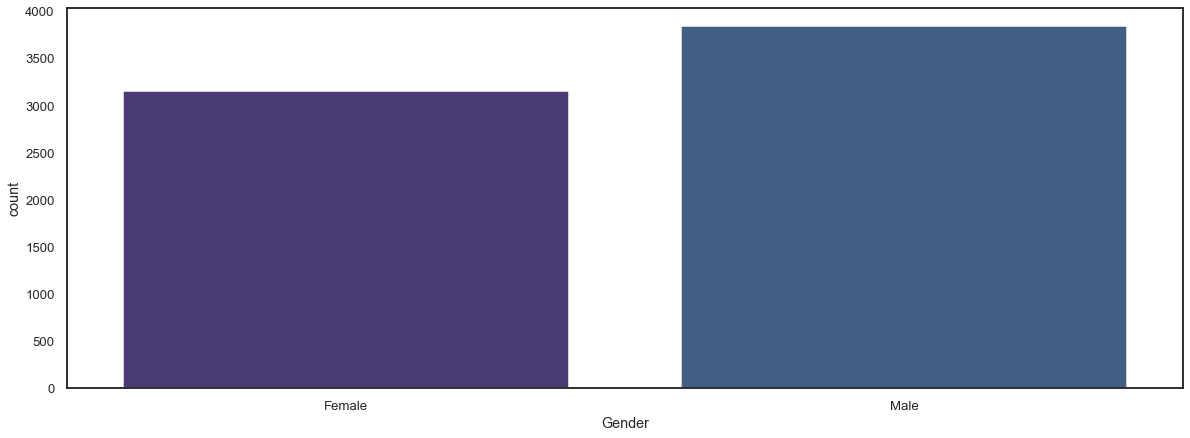

In [104]:
sns.countplot('Gender',data = praisedata)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


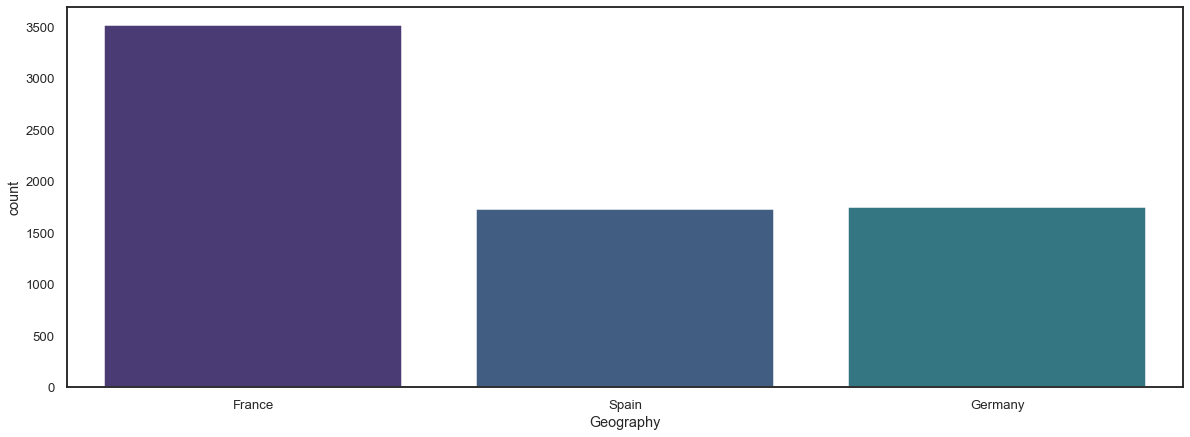

In [105]:
sns.countplot('Geography',data = praisedata)
plt.show()

## To encode the numeric variables

In [106]:
#Encoding the categorical variables
from sklearn import preprocessing

#creating label encoader
le = preprocessing.LabelEncoder()

In [107]:
praisedata['Gender']=le.fit_transform(praisedata['Gender'])

praisedata['Geography']=le.fit_transform(praisedata['Geography'])

In [108]:
praisedata.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,0,0,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,0,1,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,0,0,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,2,1,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,1,1,37,9,108308.11,1,1,0,41788.25,1


In [109]:
#Since surname is not useful in the data generation, I am dropping it

praisedata.drop('Surname', axis=1, inplace=True)

In [110]:
praisedata.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,601,0,0,41,1,0.00,2,0,1,160607.06,0
1,15574523,576,0,1,39,1,0.00,2,1,1,68814.23,0
2,15587443,728,0,0,69,1,0.00,2,1,1,131804.86,0
3,15768682,640,2,1,39,3,0.00,1,1,1,105997.25,0
4,15569682,768,1,1,37,9,108308.11,1,1,0,41788.25,1


In [111]:
praisedata.corr()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.008499,0.004044,-0.007481,0.009929,-0.018993,-0.021439,0.011442,-0.019029,-0.011828,0.032816,-0.007060
CreditScore,0.008499,1.000000,-0.004482,-0.006991,-0.002511,-0.006013,0.002181,0.008048,-0.008505,0.026724,-0.007756,-0.032201
Geography,0.004044,-0.004482,1.000000,-0.000257,0.009800,0.002723,0.071012,0.002317,-0.008244,0.001846,-0.002684,0.032632
Gender,-0.007481,-0.006991,-0.000257,1.000000,-0.024932,0.011091,0.007610,-0.012755,0.021000,0.025304,-0.003190,-0.101712
Age,0.009929,-0.002511,0.009800,-0.024932,1.000000,0.001982,0.019424,-0.030046,-0.014927,0.085195,0.009270,0.288732
Tenure,-0.018993,-0.006013,0.002723,0.011091,0.001982,1.000000,0.001221,-0.003052,0.025304,-0.025239,0.007210,-0.009668
Balance,-0.021439,0.002181,0.071012,0.007610,0.019424,0.001221,1.000000,-0.303379,-0.009317,-0.010813,0.018277,0.111493
NumOfProducts,0.011442,0.008048,0.002317,-0.012755,-0.030046,-0.003052,-0.303379,1.000000,0.009249,0.008045,0.015463,-0.040043
HasCrCard,-0.019029,-0.008505,-0.008244,0.021000,-0.014927,0.025304,-0.009317,0.009249,1.000000,-0.020230,-0.010966,-0.008701
IsActiveMember,-0.011828,0.026724,0.001846,0.025304,0.085195,-0.025239,-0.010813,0.008045,-0.020230,1.000000,-0.018574,-0.167725


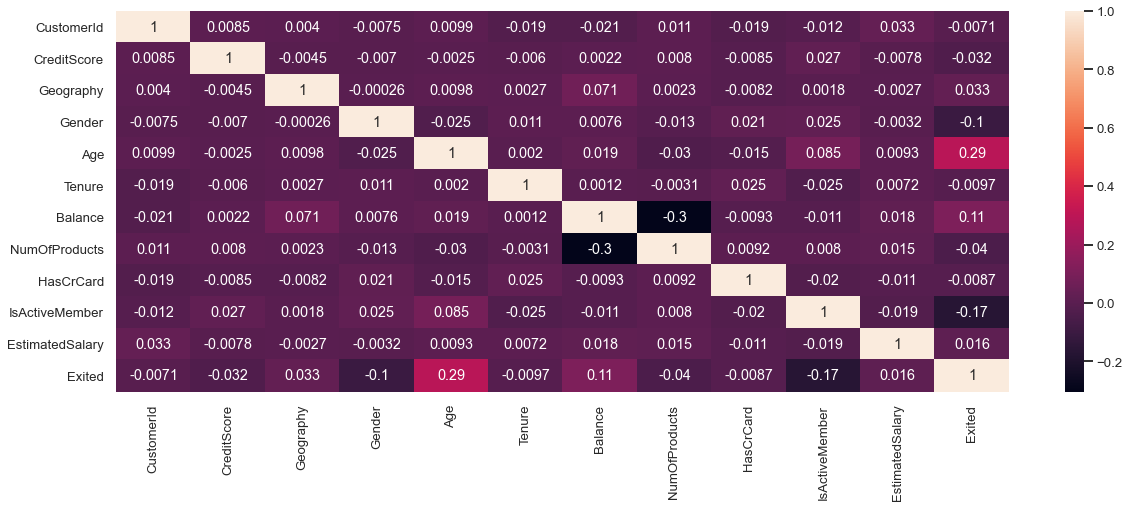

In [112]:
sns.heatmap(praisedata.corr(), annot=True) 
plt.show()

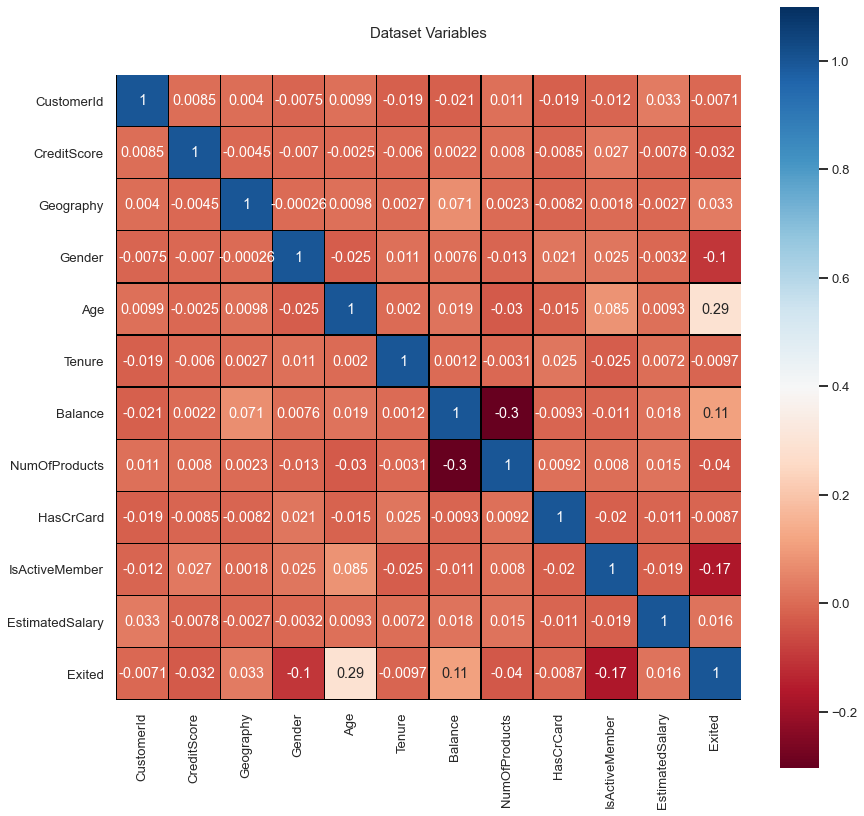

In [115]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,14))
plt.title('Dataset Variables', y=1.05, size=15) 
sns.heatmap(praisedata.corr(),linewidths=0.2,vmax=1.1,
            square=True, cmap=colormap, linecolor='black', annot=True)
plt.show()

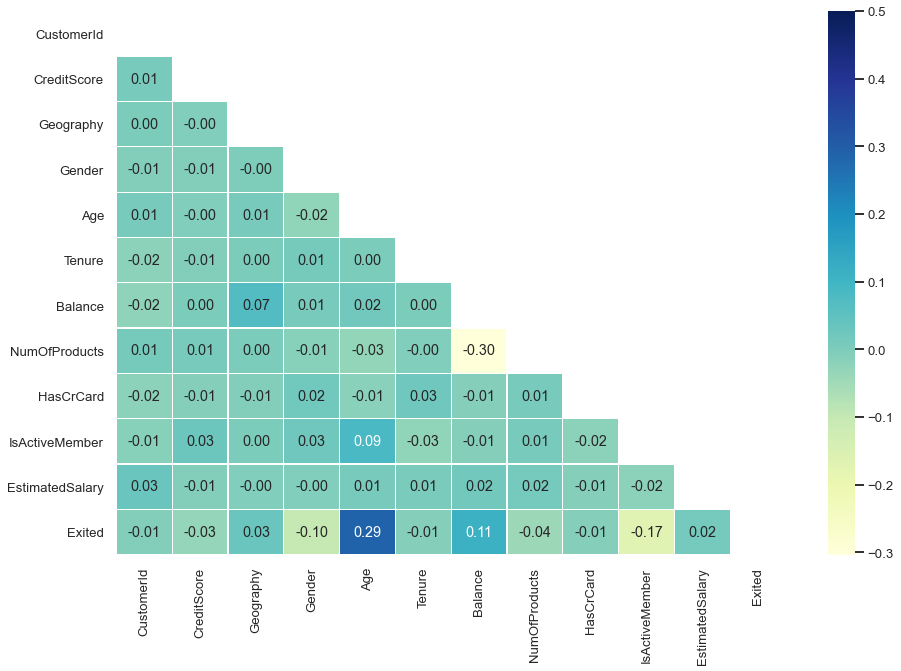

In [116]:
# Calculate correlations
corr = praisedata.corr()
mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True 
# Heatmap
plt.figure(figsize=(15, 10)) 
sns.heatmap(corr,
            vmax=.5, 
            mask=mask,
            annot=True, fmt='.2f', 
            linewidths=.2, cmap="YlGnBu")
plt.show()

In [119]:
#To find correlations with the target and sort
correlations = praisedata.corr()['Exited'].sort_values() 
print('Most Positive Correlations: \n', correlations.tail(5)) 
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 EstimatedSalary    0.016426
Geography          0.032632
Balance            0.111493
Age                0.288732
Exited             1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.167725
Gender           -0.101712
NumOfProducts    -0.040043
CreditScore      -0.032201
Tenure           -0.009668
Name: Exited, dtype: float64


In [135]:
a_train = praisedata[['CreditScore','Age','Balance','NumOfProducts','IsActiveMember']].values
b_train = praisedata['Exited'].values

In [136]:
a_test = praisedata1[['CreditScore','Age','Balance','NumOfProducts','IsActiveMember']]

In [128]:
from sklearn.linear_model import LogisticRegression

In [137]:
classifier = LogisticRegression()
classifier.fit(a_train,b_train)
b_pred = classifier.predict(a_test)

In [144]:
ditto = {'CustomerId' : praisedata1['CustomerId'],'Exited':b_pred}

In [146]:
answer = pd.DataFrame(ditto)
answer.head()

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,0
3,15582591,0
4,15595937,0


In [147]:
answer.to_csv('answer.csv', index = False)

## Decision Tree Classifier

In [150]:
fea = praisedata[['CreditScore','Age','Balance','NumOfProducts','IsActiveMember']]
tar = praisedata['Exited']

[0.28742217 0.30973847 0.21886643 0.14564965 0.03832328]


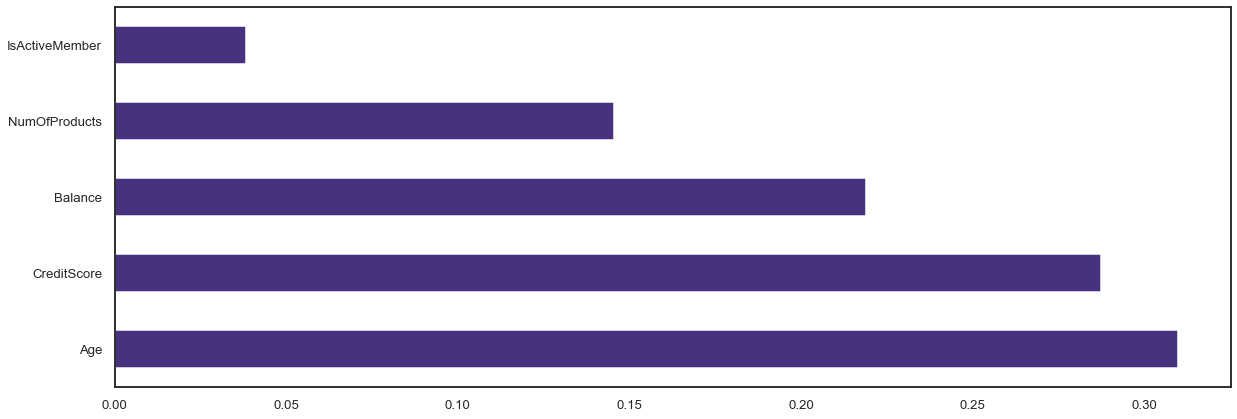

In [154]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(fea,tar)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=fea.columns) 
feat_importance.nlargest(15).plot(kind = 'barh')
plt.show()

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
fea_train,fea_test,tar_train,tar_test = train_test_split(fea,tar, test_size = 0.2, random_state = 0)

In [157]:
fea_train

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember
6137,850,24,0.00,2,1
4778,684,40,137326.65,1,0
3149,648,41,123049.21,1,1
4638,733,39,91538.51,1,1
4110,610,27,87262.40,2,0
...,...,...,...,...,...
4931,724,31,160997.54,2,1
3264,515,60,113715.36,1,0
1653,673,30,64097.75,1,1
2607,735,29,0.00,2,1


In [158]:
#importing the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [160]:
clasifier1 = DecisionTreeClassifier()
model1 = clasifier1.fit(fea_train, tar_train)

In [164]:
#Prediction

tar_pred = model1.predict(a_test)

In [165]:
ditto2 = {'CustomerId' : praisedata1['CustomerId'],'Exited':tar_pred}

In [166]:
answer2 = pd.DataFrame(ditto2)
answer2.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [167]:
answer2.to_csv('answer2.csv', index = False)

## Random Forest Classifier

In [168]:
#Importing the random forest classifier

from sklearn.ensemble import RandomForestClassifier 
clasifier2 = RandomForestClassifier(n_estimators=200, ) 
model2 = clasifier2.fit(fea_train, tar_train)

In [172]:
tar_pred = model2.predict(a_test) 

In [175]:
ditto3 = {'CustomerId' : praisedata1['CustomerId'],'Exited':tar_pred}

In [177]:
answer3 = pd.DataFrame(ditto3)
answer3.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [178]:
answer3.to_csv('answer3.csv', index = False)

## Gradient Boosting Classifier

In [180]:
#Importing the Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
clasifier3 = GradientBoostingClassifier()
model3 = clasifier3.fit(fea_train, tar_train)

In [186]:
tar_pred = model3.predict(a_test)

In [187]:
ditto4 = {'CustomerId' : praisedata1['CustomerId'],'Exited':tar_pred}

In [188]:
answer4 = pd.DataFrame(ditto4)
answer4.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [184]:
answer4.to_csv('answer4.csv', index = False)

## Support Vector Machine

In [185]:
from sklearn.svm import SVC
clasifier4 = SVC(kernel='poly', random_state=0) 
model4 = clasifier4.fit(fea_train, tar_train)

In [189]:
 tar_pred = model4.predict(a_test)

In [190]:
ditto5 = {'CustomerId' : praisedata1['CustomerId'],'Exited':tar_pred}

In [191]:
answer5 = pd.DataFrame(ditto5)
answer5.head()

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,0
3,15582591,0
4,15595937,0


In [192]:
answer5.to_csv('answer5.csv', index = False)